In [2]:
from IPython.display import Image

# **Revolution 302**

## PN Data

The odf for rotation 302 was downloaded as before using the `odfid`. The same data processing techniques were copied to produce spectra for the PN and MOS cameras. The spectra for the 2 MOS cameras were merged. 

### Creating the Lightcurve


The lightcurve for this revolution differs from the 1st, but still has the same flaring event. It was filtered using a different method than before as using gtibuild didn't seem to work.

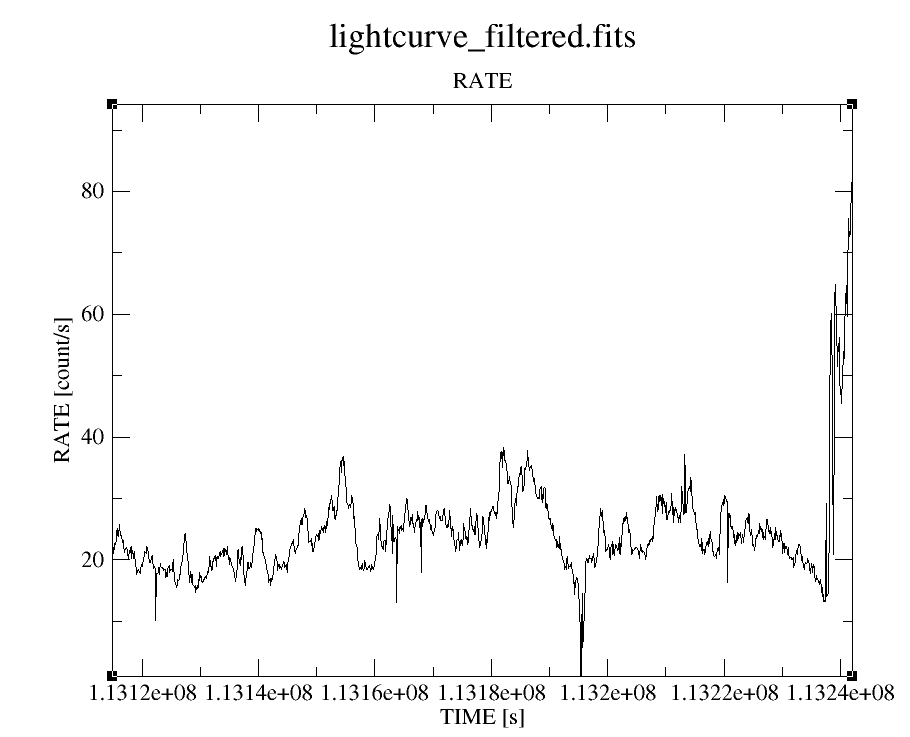

In [3]:
Image(filename="302_figs/pn_lc.png")

In [ ]:
evselect table=EPIC_filtered.fits withfilteredset=yes filteredset=pn_clean.fits filtertype=expression  expression='TIME < 1.13327e08' keepfilteroutput=yes updateexposure=yes


In [ ]:
evselect table=pn_clean.fits withrateset=yes rateset=pn_clean_lightcurve.fits maketimecolumn=yes timebinsize=100 makeratecolumn=yes timemin=1.1312e08 timemax=1.13235e08

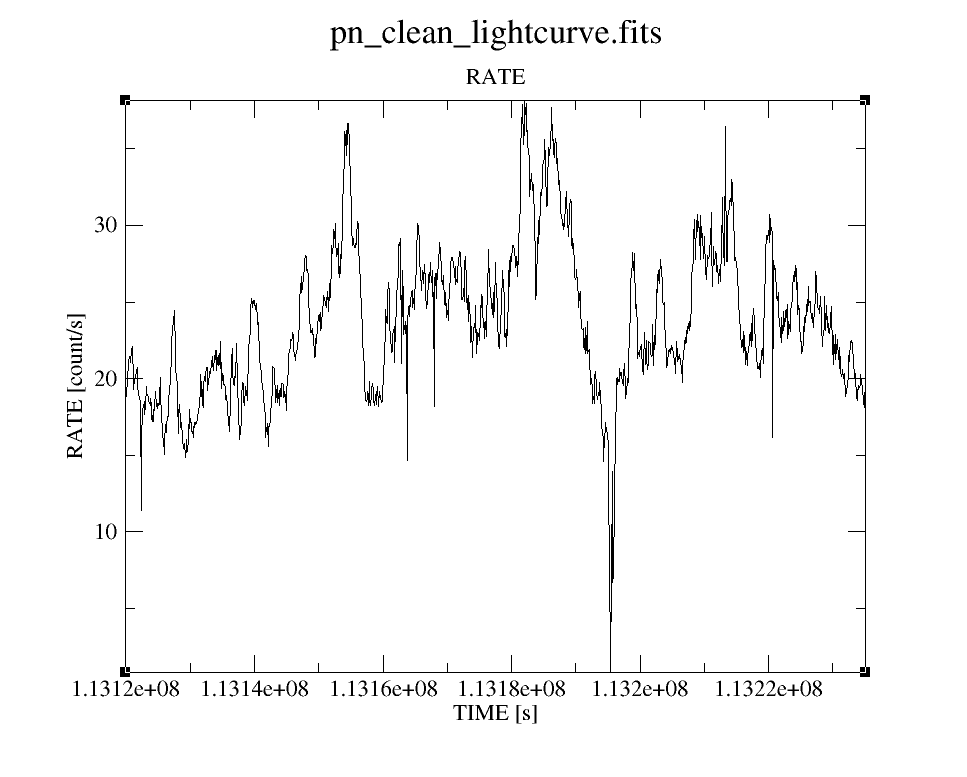

In [4]:
Image(filename="302_figs/pn_lc_filt.png")

#### Pileup

In [ ]:
evselect table=pn_clean.fits energycolumn='PI' withfilteredset=yes filteredset=pn_source_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=pn_source_spec.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=20479 expression='((X,Y) IN circle(26273,27909,641.7))'

In [ ]:
evselect table=pn_clean.fits withfilteredset=yes filteredset=pn_bkg_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=pn_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=20479 expression='((X,Y) IN circle(29257,25919,1124))'

In [ ]:
backscale spectrumset=pn_source_spec.fits badpixlocation=pn_clean.fits

In [ ]:
backscale spectrumset=pn_backg_spec.fits badpixlocation=pn_clean.fits

In [ ]:
epatplot set=pn_clean.fits plotfile=pn_pileup.ps useplotfile=yes withbackgroundset=yes backgroundset=pn_bkg_filtered.fits

In [ ]:
gv mos1_pileup.ps &

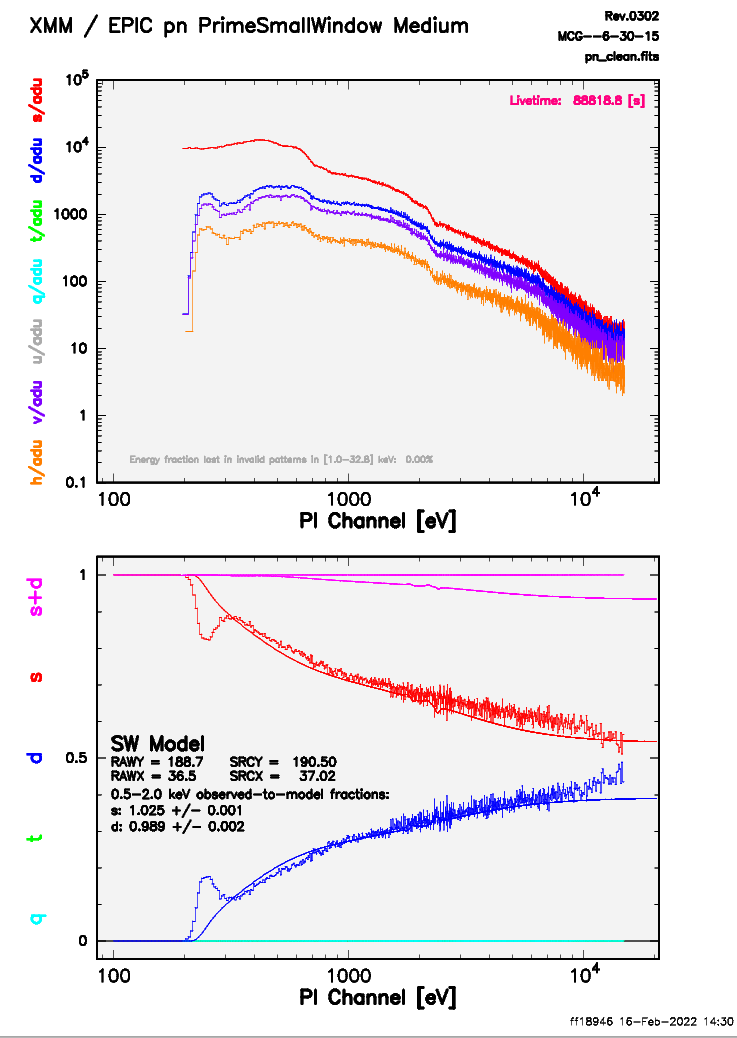

In [5]:
Image(filename="302_figs/pn_pileup.png")

#### Spectrum

In [ ]:
rmfgen spectrumset=pn_source_spec.fits rmfset=pn.rmf

In [ ]:
arfgen spectrumset=pn_source_spec.fits arfset=pn.arf withrmfset=yes rmfset=pn.rmf badpixlocation=pn_clean.fits detmaptype=psf

In [ ]:
specgroup spectrumset=pn_source_spec.fits mincounts=25 oversample=3 rmfset=pn.rmf arfset=pn.arf backgndset=pn_backg_spec.fits groupedset=pn_spectrum_grp.fits

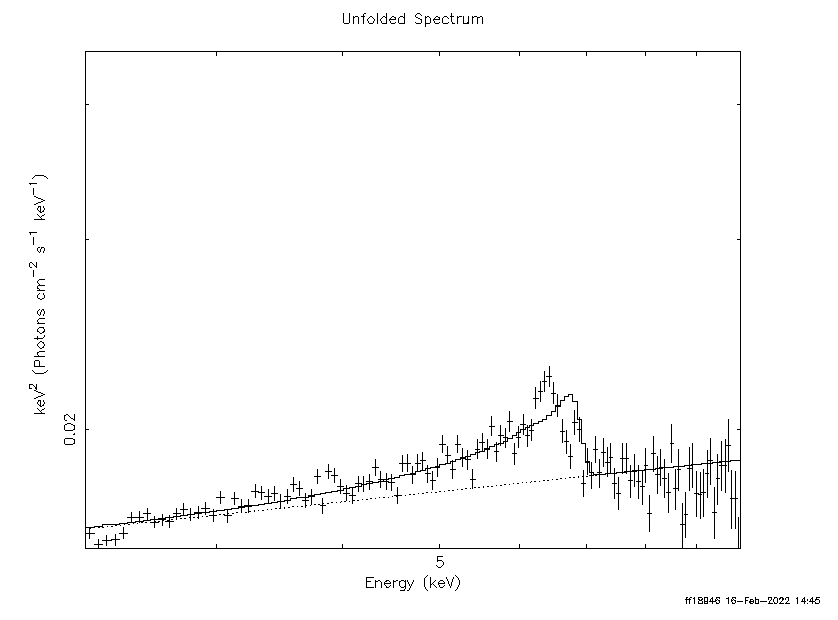

In [6]:
Image(filename="302_figs/pn_laor2.png")

## MOS Data

### Lightcurves

##### filtering for mos1

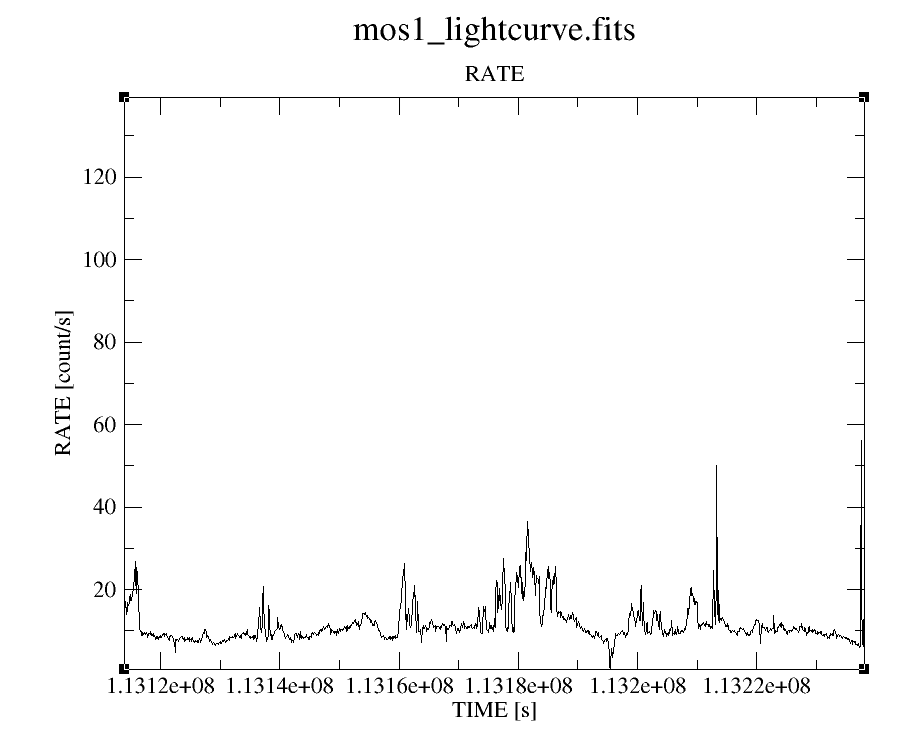

In [10]:
Image(filename="302_figs/mos1_lc.png")

In [ ]:
evselect table=mos1_filtered.fits withfilteredset=yes filteredset=mos1_clean.fits filtertype=expression  expression='TIME < 1.13327e08' keepfilteroutput=yes updateexposure=yes

In [ ]:
evselect table=mos1_clean.fits withrateset=yes rateset=mos1_clean_lightcurve.fits maketimecolumn=yes timebinsize=100 makeratecolumn=yes timemin=1.1312e08 timemax=1.13235e08

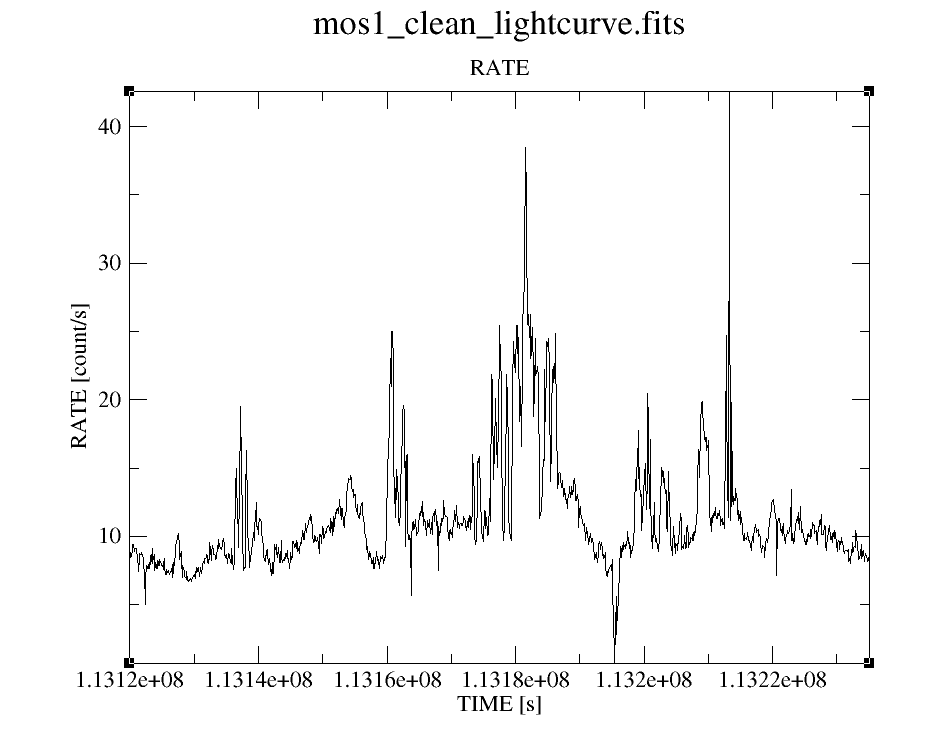

In [8]:
Image(filename="302_figs/mos1_lc_filt.png")

##### filtering for mos2

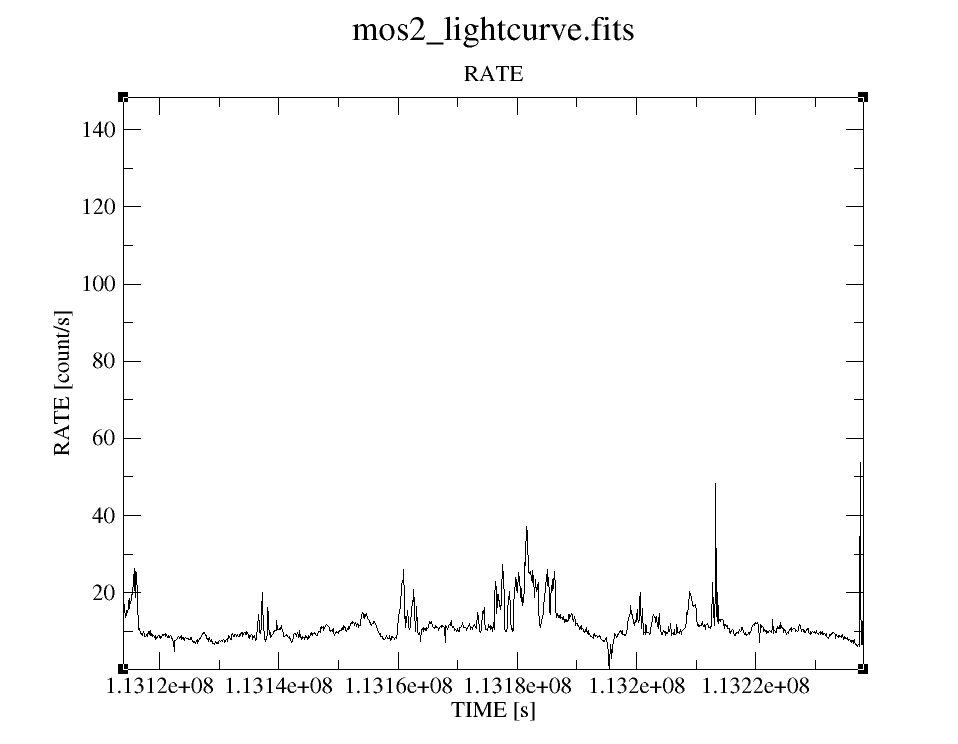

In [11]:
Image(filename="302_figs/mos2_lc.png")

In [ ]:
evselect table=mos2_filtered.fits withfilteredset=yes filteredset=mos2_clean.fits filtertype=expression  expression='TIME < 1.13327e08' keepfilteroutput=yes updateexposure=yes

In [ ]:
evselect table=mos2_clean.fits withrateset=yes rateset=mos2_clean_lightcurve.fits maketimecolumn=yes timebinsize=100 makeratecolumn=yes timemin=1.1312e08 timemax=1.13235e08

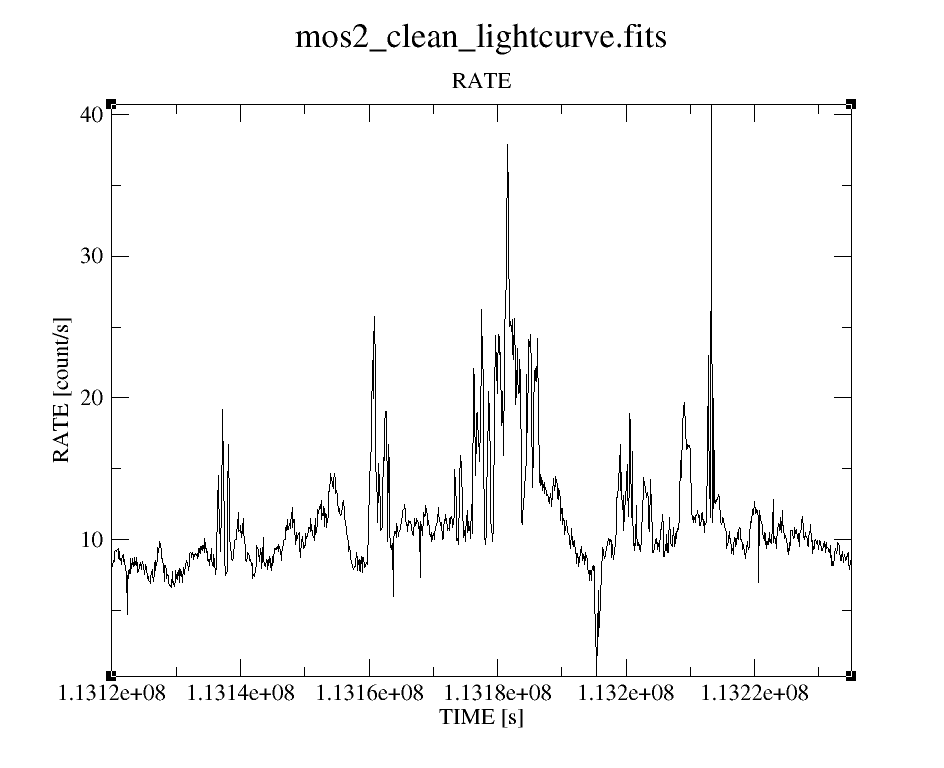

In [12]:
Image(filename="302_figs/mos2_lc_filt.png")

### Pile up

The same regions for the source and background regions were used from revolution 301 and the source and background spectra were extracted to produce the pileup

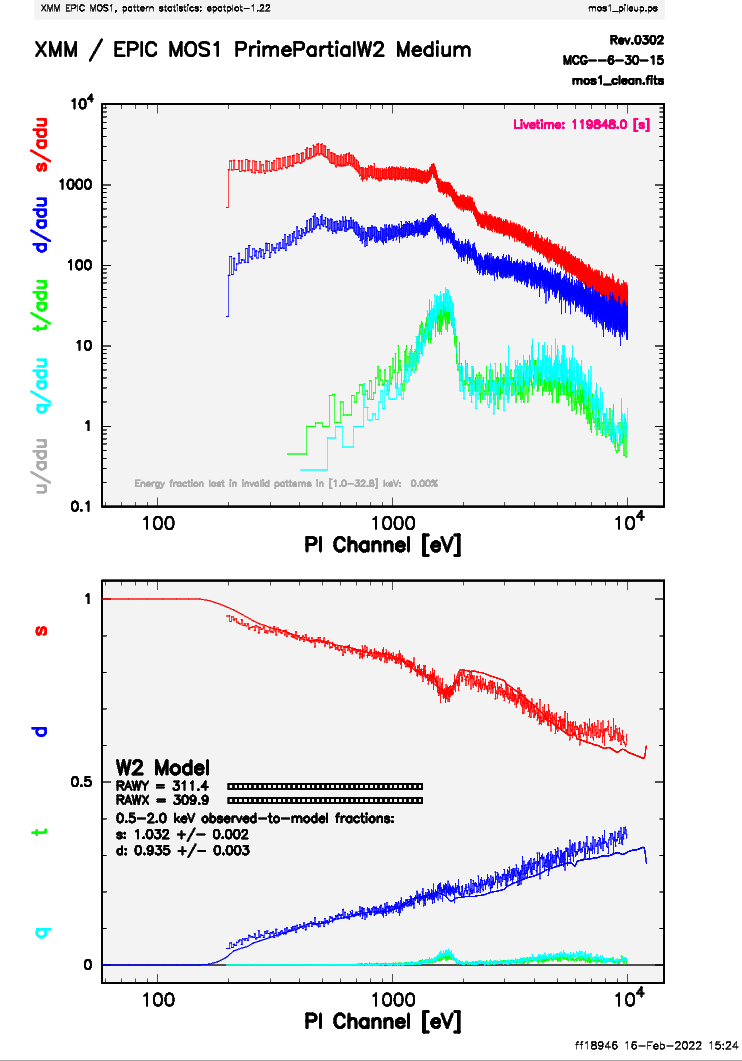

In [13]:
Image(filename="302_figs/mos1_pileup.png")

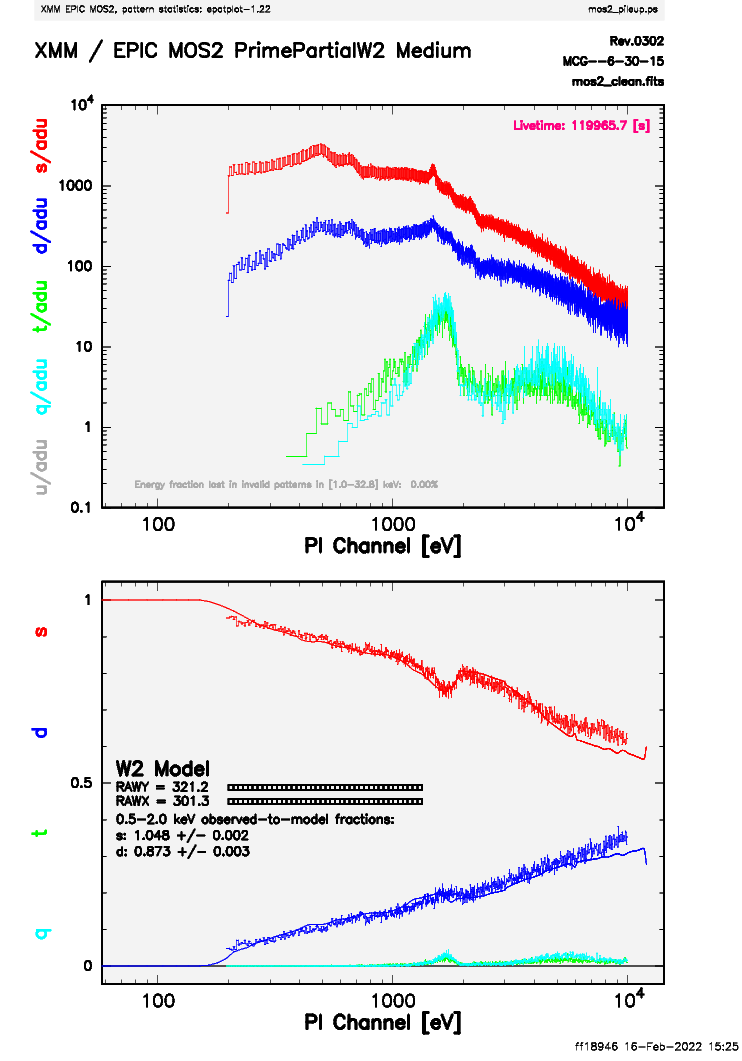

In [14]:
Image(filename="302_figs/mos2_pileup.png")

The data for both mos cameras was merged as before.